# Classification problem for bank.
we have banks customer data and based on their geography we will predict whether they will leave the bank or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv('Churn_Modelling.csv')

In [3]:
import pandas_profiling
dataset.profile_report()

In [4]:
dataset.isnull().values.any()

False

From columns we can judge RowNumber, Customer ID , Surname wont help us in classifying. so we wont take them as independent variable

In [5]:
x= dataset.iloc[:,3:13].values
y= dataset.iloc[:,13].values

Labeling and Creating dummy variables

In [6]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()
x[:,1]= le1.fit_transform(x[:,1])

# second object for second gender col
le2= LabelEncoder()
x[:,2]= le1.fit_transform(x[:,2])

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(categorical_features=[1])
x= ohe.fit_transform(x).toarray()

#Removing first variable to avoid dummy variable trap
x= x[:,1:]

x[1]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

Feature scaling for normalization

In [8]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x= ss.fit_transform(x)

Splitting The dataset

In [9]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)


Building the ANN, using keras with tensorflow as backend, as keras is mix of theanos and tensorflow.

# Steps in ANN
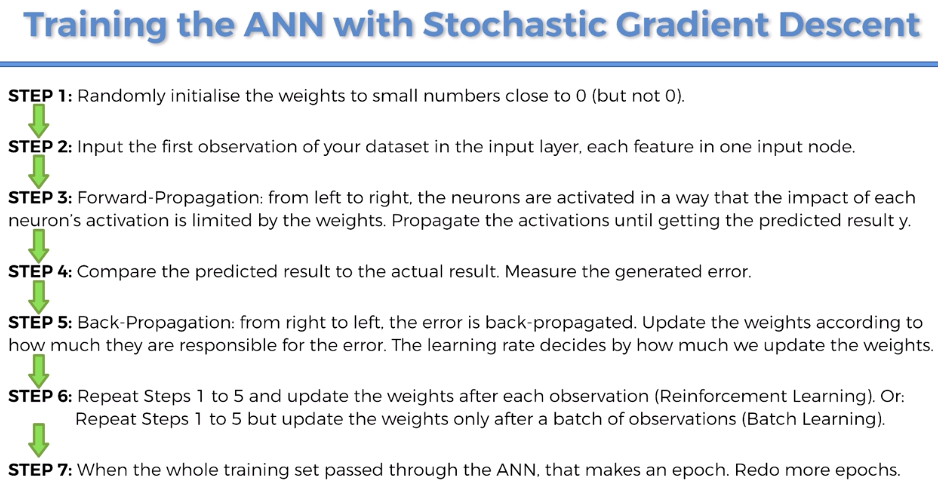

In [10]:
# Libraries for ANN
import keras
from keras.models import Sequential # Used to initialise our ANN
from keras.layers import Dense # Use to built layers of ANN
from keras.layers import LeakyReLU,PReLU,ELU # Activation functions
from keras.layers import Dropout # For Dropout Regualarisation

There are two ways of initialising the ANN:
1. By initialising the Layers
2. By initialising the Graph

In [34]:
#Creating the object for Sequential class which we will use to initialise Input, Hidden and Output layers
classifier= Sequential()

# First Input layer and hidden layer creation
classifier.add(Dense(units=15, 
                     activation='relu',
                     kernel_initializer='he_uniform',
                     input_dim=11
                    ))
# units= No of output neuron we need from input layer for first hidden layer , as general rule it is avg(input+output)
# activation= Activation functions on hidden layer neuron
# kernel_initializer= Weight initialization from first input layer
# input_shape = No of input from innput laye, model will take as input arrays of shape (*, 16)

#Adding Second Hidden Layer but we wont specify the input shape in this,as we already know we will get 15 from first HL.
classifier.add(Dense(units=10, 
                     activation='relu',
                     kernel_initializer='he_uniform'
                    ))

#Adding third Hidden Layer but we wont specify the input shape in this,as we already know we will get 10 from first HL.
classifier.add(Dense(units=6, 
                     activation='relu',
                     kernel_initializer='he_uniform'
                    ))

#Adding the output layer.
classifier.add(Dense(units=1, # as out put will have one layer
                     activation='sigmoid', # for binary output as o and 1, for ordinal it will be softmax
                     kernel_initializer='glorot_uniform' #Weight initialization for output from 2nd HL.
                    ))

#Compling the ANN, means how it will get trained and reduce the loss using optimizer like SGD or GD
classifier.compile(optimizer= 'adam', # Adam refers to Stochastic gradient descent
                  loss= ['binary_crossentropy'], # This refers to the loss function for binary output,
#                    for ordinal it will 'categorical_crossentropy'
                   metrics= ['accuracy']
                  )

# Fitting the model with training set.
classifier.fit(xtrain,ytrain,validation_split= 0.33,batch_size=80,epochs=100)
# batch_size= is no of obs we will consider to do the batch processing and calculate the loss and new weights.
# epochs= No of times we need to do it

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 151us/step - loss: 0.5144 - acc: 0.7938 - val_loss: 0.5024 - val_acc: 0.7899
Epoch 2/100
5359/5359 [==============================] - 0s 33us/step - loss: 0.4730 - acc: 0.7979 - val_loss: 0.4764 - val_acc: 0.7899
Epoch 3/100
5359/5359 [==============================] - 0s 43us/step - loss: 0.4533 - acc: 0.7979 - val_loss: 0.4621 - val_acc: 0.7899
Epoch 4/100
5359/5359 [==============================] - 0s 37us/step - loss: 0.4420 - acc: 0.7979 - val_loss: 0.4522 - val_acc: 0.7899
Epoch 5/100
5359/5359 [==============================] - 0s 31us/step - loss: 0.4333 - acc: 0.7979 - val_loss: 0.4444 - val_acc: 0.7906
Epoch 6/100
5359/5359 [==============================] - 0s 31us/step - loss: 0.4256 - acc: 0.7987 - val_loss: 0.4374 - val_acc: 0.7910
Epoch 7/100
5359/5359 [==============================] - 0s 36us/step - loss: 0.4188 - acc: 0.8011 - val_loss: 0.4306 - val_acc: 0.7936

5359/5359 [==============================] - 0s 25us/step - loss: 0.3151 - acc: 0.8701 - val_loss: 0.3514 - val_acc: 0.8535
Epoch 61/100
5359/5359 [==============================] - 0s 25us/step - loss: 0.3142 - acc: 0.8716 - val_loss: 0.3536 - val_acc: 0.8512
Epoch 62/100
5359/5359 [==============================] - 0s 25us/step - loss: 0.3146 - acc: 0.8724 - val_loss: 0.3513 - val_acc: 0.8535
Epoch 63/100
5359/5359 [==============================] - 0s 24us/step - loss: 0.3146 - acc: 0.8701 - val_loss: 0.3522 - val_acc: 0.8531
Epoch 64/100
5359/5359 [==============================] - 0s 25us/step - loss: 0.3134 - acc: 0.8711 - val_loss: 0.3514 - val_acc: 0.8535
Epoch 65/100
5359/5359 [==============================] - 0s 25us/step - loss: 0.3132 - acc: 0.8716 - val_loss: 0.3511 - val_acc: 0.8542
Epoch 66/100
5359/5359 [==============================] - 0s 25us/step - loss: 0.3133 - acc: 0.8720 - val_loss: 0.3518 - val_acc: 0.8550
Epoch 67/100
5359/5359 [==============================

In [35]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                180       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


Total Params are no of weights and bias needed on all neurons

In [36]:
#Predicting the test values but in ANN predict gives the probabality of it output being 1, so we need to choose
# the threshold , so more than threshold is positive and less than it is negative
yp= classifier.predict(xtest)
yp= (yp>0.5)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(yp,ytest)
score= accuracy_score(yp,ytest)

In [38]:
cm

array([[1524,  214],
       [  77,  185]])

In [39]:
score

0.8545

In [40]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(ss.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])

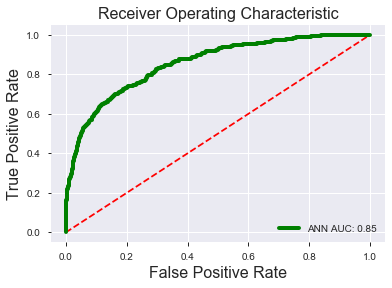

In [28]:
from sklearn.metrics import roc_curve,auc
# Plotting random line
plt.plot(figsize= (15,15))
%matplotlib inline
plt.plot([0,1],[0,1], 'r--' )

#calculating prob
prob= classifier.predict(xtest)
fpr, tpr, threshold= roc_curve(ytest,prob)
#roc return fpr tpr and threshold so storing them separately
roc_auc= auc(fpr,tpr)

#Ploting ROC
label = 'ANN AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 10)

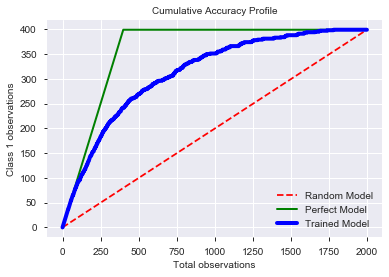

In [29]:
total = len(ytest) #total no of outcomes in y test
count1 = np.sum(ytest) # total values of 1
count0 = total - count1 # total values of 0

#Random Model:  which is based on the fact that the correct detection of class 1.0 will grow linearly
plt.plot([0,total],[0,count1],c='r' , linestyle= '--' , label='Random Model')

#perfect model one which will detect all class 1.0 data points in the same number of tries as there are class 1.0 data points.
# It takes exactly 31 tries for the perfect model to identify 31 class 1.0 data points.
plt.plot([0,count1,total],
        [0,count1,count1],
        c='g',
        linewidth=2,
        label='Perfect Model')

#Trained Model
prob= classifier.predict(xtest)
modely= [y for _,y in sorted(zip(prob,ytest), reverse=True)] #Sorted in Ascending to get maximum prob in first
y= np.append([0],np.cumsum(modely)) # added 0 to start it from (0,0)
x= np.arange(0,total+1)

plt.plot(x,y, c='b', linewidth=4, label='Trained Model')
plt.xlabel('Total observations', fontsize = 10)
plt.ylabel('Class 1 observations', fontsize = 10)
plt.title('Cumulative Accuracy Profile', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10)

In [30]:
# Cap Analysis using AUC
ar= auc([0,total], [0,count1]) #area of random model

ap= auc([0,count1,total], [0,count1,count1]) # area of perfect model

at= auc(x,y) # area of trained model

print("Accuracy Rate for ANN: {}".format(at / ap))

Accuracy Rate for ANN: 0.8704606559442204


## Dropout Regularization

In [41]:
#Creating the object for Sequential class which we will use to initialise Input, Hidden and Output layers
classifier= Sequential()

# First Input layer and hidden layer creation
classifier.add(Dense(units=15, 
                     activation='relu',
                     kernel_initializer='he_uniform',
                     input_dim=11
                    ))

classifier.add(Dropout(0.4))
# units= No of output neuron we need from input layer for first hidden layer , as general rule it is avg(input+output)
# activation= Activation functions on hidden layer neuron
# kernel_initializer= Weight initialization from first input layer
# input_shape = No of input from innput laye, model will take as input arrays of shape (*, 16)

#Adding Second Hidden Layer but we wont specify the input shape in this,as we already know we will get 15 from first HL.
classifier.add(Dense(units=10, 
                     activation='relu',
                     kernel_initializer='he_uniform'
                    ))
classifier.add(Dropout(0.3))

#Adding third Hidden Layer but we wont specify the input shape in this,as we already know we will get 10 from first HL.
classifier.add(Dense(units=6, 
                     activation='relu',
                     kernel_initializer='he_uniform'
                    ))
classifier.add(Dropout(0.2))

#Adding the output layer.
classifier.add(Dense(units=1, # as out put will have one layer
                     activation='sigmoid', # for binary output as o and 1, for ordinal it will be softmax
                     kernel_initializer='glorot_uniform' #Weight initialization for output from 2nd HL.
                    ))

#Compling the ANN, means how it will get trained and reduce the loss using optimizer like SGD or GD
classifier.compile(optimizer= 'adam', # Adam refers to Stochastic gradient descent
                  loss= ['binary_crossentropy'], # This refers to the loss function for binary output,
#                    for ordinal it will 'categorical_crossentropy'
                   metrics= ['accuracy']
                  )

# Fitting the model with training set.
classifier.fit(xtrain,ytrain,validation_split= 0.33,batch_size=80,epochs=100)
# batch_size= is no of obs we will consider to do the batch processing and calculate the loss and new weights.
# epochs= No of times we need to do it

W0805 20:47:45.402511 4497470912 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 172us/step - loss: 0.6410 - acc: 0.6688 - val_loss: 0.5272 - val_acc: 0.7830
Epoch 2/100
5359/5359 [==============================] - 0s 36us/step - loss: 0.6074 - acc: 0.7375 - val_loss: 0.5097 - val_acc: 0.7940
Epoch 3/100
5359/5359 [==============================] - 0s 37us/step - loss: 0.5609 - acc: 0.7834 - val_loss: 0.4923 - val_acc: 0.7910
Epoch 4/100
5359/5359 [==============================] - 0s 33us/step - loss: 0.5332 - acc: 0.7888 - val_loss: 0.4822 - val_acc: 0.7899
Epoch 5/100
5359/5359 [==============================] - 0s 35us/step - loss: 0.5265 - acc: 0.7968 - val_loss: 0.4755 - val_acc: 0.7899
Epoch 6/100
5359/5359 [==============================] - 0s 32us/step - loss: 0.5181 - acc: 0.7959 - val_loss: 0.4715 - val_acc: 0.7899
Epoch 7/100
5359/5359 [==============================] - 0s 32us/step - loss: 0.5071 - acc: 0.7972 - val_loss: 0.4687 - val_acc: 0.7899

5359/5359 [==============================] - 0s 29us/step - loss: 0.4135 - acc: 0.8203 - val_loss: 0.3997 - val_acc: 0.8137
Epoch 61/100
5359/5359 [==============================] - 0s 29us/step - loss: 0.4127 - acc: 0.8222 - val_loss: 0.3960 - val_acc: 0.8232
Epoch 62/100
5359/5359 [==============================] - 0s 30us/step - loss: 0.4120 - acc: 0.8274 - val_loss: 0.3948 - val_acc: 0.8239
Epoch 63/100
5359/5359 [==============================] - 0s 29us/step - loss: 0.4142 - acc: 0.8266 - val_loss: 0.3959 - val_acc: 0.8201
Epoch 64/100
5359/5359 [==============================] - 0s 29us/step - loss: 0.4094 - acc: 0.8242 - val_loss: 0.3934 - val_acc: 0.8213
Epoch 65/100
5359/5359 [==============================] - 0s 29us/step - loss: 0.4069 - acc: 0.8255 - val_loss: 0.3911 - val_acc: 0.8266
Epoch 66/100
5359/5359 [==============================] - 0s 29us/step - loss: 0.4075 - acc: 0.8255 - val_loss: 0.3899 - val_acc: 0.8266
Epoch 67/100
5359/5359 [==============================

In [42]:
yp= classifier.predict_classes(xtest)
confusion_matrix(yp,ytest)


array([[1581,  281],
       [  20,  118]])

In [44]:
accuracy_score(yp,ytest)

0.8495

# Overview
Keras is a popular library for deep learning in Python, but the focus of the library is deep learning. In fact it strives for minimalism, focusing on only what you need to quickly and simply define and build deep learning models.

The scikit-learn library in Python is built upon the SciPy stack for efficient numerical computation. It is a fully featured library for general machine learning and provides many utilities that are useful in the development of deep learning models. Not least:

1. Evaluation of models using resampling methods like k-fold cross validation.
2. Efficient search and evaluation of model hyper-parameters.

The Keras library provides a convenient wrapper for deep learning models to be used as classification or regression estimators in scikit-learn.

The KerasClassifier and KerasRegressor classes in Keras take an argument build_fn which is the name of the function to call to get your model.

You must define a function like build_classifier that defines your model, compiles it and returns it.

In the example, below we define a function build_classifier() that create a simple multi-layer neural network for the problem.

We pass this function name to the KerasClassifier class by the build_fn argument. We also pass in additional arguments of epoch=150 and batch_size=10. These are automatically bundled up and passed on to the fit() function which is called internally by the KerasClassifier class.

Reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [27]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense


#Defining the function to create a neural network
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Fitting the model 
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
# calculating the CV score 
kfold= StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = kfold, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

print('Mean: {}, Variance: {}'.format(mean,variance))

Mean: 0.8469987113510349, Variance: 0.015006607215835637


In [53]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#Defining the function to create the a network with optimizer as parameter
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 32],
              'epochs': [50, 80],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy'
                           )
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
5333/5333 [==============================] - 4s 793us/step - loss: 0.6150 - acc: 0.7971
Epoch 2/50
5333/5333 [==============================] - 1s 142us/step - loss: 0.4541 - acc: 0.7986
Epoch 3/50
5333/5333 [==============================] - 1s 137us/step - loss: 0.4359 - acc: 0.7986
Epoch 4/50
5333/5333 [==============================] - 1s 149us/step - loss: 0.4306 - acc: 0.7986
Epoch 5/50
5333/5333 [==============================] - 1s 140us/step - loss: 0.4255 - acc: 0.7986
Epoch 6/50
5333/5333 [==============================] - 1s 140us/step - loss: 0.4210 - acc: 0.7986
Epoch 7/50
5333/5333 [==============================] - 1s 139us/step - loss: 0.4167 - acc: 0.8239
Epoch 8/50
5333/5333 [==============================] - 1s 145us/step - loss: 0.4131 - acc: 0.8290
Epoch 9/50
5333/5333 [==============================] - 1s 141us/step - loss: 0.4101 - acc: 0.8350
Epoch 10/50
5333/5333 [==============================] - 1s 140us/step - loss: 0.4075 - acc: 0.8352
Epoch 11/

5333/5333 [==============================] - 1s 231us/step - loss: 0.3973 - acc: 0.8386
Epoch 34/50
5333/5333 [==============================] - 1s 153us/step - loss: 0.3977 - acc: 0.8380
Epoch 35/50
5333/5333 [==============================] - 1s 134us/step - loss: 0.3968 - acc: 0.8369
Epoch 36/50
5333/5333 [==============================] - 1s 148us/step - loss: 0.3971 - acc: 0.8380
Epoch 37/50
5333/5333 [==============================] - 1s 156us/step - loss: 0.3962 - acc: 0.8361
Epoch 38/50
5333/5333 [==============================] - 1s 192us/step - loss: 0.3968 - acc: 0.8378
Epoch 39/50
5333/5333 [==============================] - 1s 157us/step - loss: 0.3962 - acc: 0.8376
Epoch 40/50
5333/5333 [==============================] - 1s 188us/step - loss: 0.3961 - acc: 0.8380
Epoch 41/50
5333/5333 [==============================] - 1s 182us/step - loss: 0.3958 - acc: 0.8356
Epoch 42/50
5333/5333 [==============================] - 1s 172us/step - loss: 0.3955 - acc: 0.8365
Epoch 43/50


5333/5333 [==============================] - 1s 134us/step - loss: 0.4031 - acc: 0.8346
Epoch 48/50
5333/5333 [==============================] - 1s 178us/step - loss: 0.4030 - acc: 0.8356
Epoch 49/50
5333/5333 [==============================] - 1s 156us/step - loss: 0.4027 - acc: 0.8365
Epoch 50/50
5333/5333 [==============================] - 1s 150us/step - loss: 0.4028 - acc: 0.8378
Epoch 1/50
5334/5334 [==============================] - 4s 833us/step - loss: 0.5975 - acc: 0.7968
Epoch 2/50
5334/5334 [==============================] - 1s 157us/step - loss: 0.4558 - acc: 0.7970
Epoch 3/50
5334/5334 [==============================] - 1s 133us/step - loss: 0.4412 - acc: 0.7970
Epoch 4/50
5334/5334 [==============================] - 1s 128us/step - loss: 0.4353 - acc: 0.7970
Epoch 5/50
5334/5334 [==============================] - 1s 123us/step - loss: 0.4315 - acc: 0.7970
Epoch 6/50
5334/5334 [==============================] - 1s 120us/step - loss: 0.4283 - acc: 0.7970
Epoch 7/50
5334/53

5333/5333 [==============================] - 1s 150us/step - loss: 0.3525 - acc: 0.8558
Epoch 32/80
5333/5333 [==============================] - 1s 137us/step - loss: 0.3522 - acc: 0.8567
Epoch 33/80
5333/5333 [==============================] - 1s 139us/step - loss: 0.3516 - acc: 0.8564
Epoch 34/80
5333/5333 [==============================] - 1s 136us/step - loss: 0.3508 - acc: 0.8554
Epoch 35/80
5333/5333 [==============================] - 1s 194us/step - loss: 0.3496 - acc: 0.8601
Epoch 36/80
5333/5333 [==============================] - 1s 200us/step - loss: 0.3497 - acc: 0.8577
Epoch 37/80
5333/5333 [==============================] - 1s 192us/step - loss: 0.3490 - acc: 0.8549
Epoch 38/80
5333/5333 [==============================] - 1s 174us/step - loss: 0.3489 - acc: 0.8581 0s - loss: 0.36
Epoch 39/80
5333/5333 [==============================] - 1s 161us/step - loss: 0.3483 - acc: 0.8566
Epoch 40/80
5333/5333 [==============================] - 1s 180us/step - loss: 0.3487 - acc: 0.8

Epoch 33/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.3926 - acc: 0.8429
Epoch 34/80
5334/5334 [==============================] - 1s 124us/step - loss: 0.3924 - acc: 0.8429
Epoch 35/80
5334/5334 [==============================] - 1s 124us/step - loss: 0.3919 - acc: 0.8399
Epoch 36/80
5334/5334 [==============================] - 1s 124us/step - loss: 0.3921 - acc: 0.8435
Epoch 37/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.3920 - acc: 0.8431
Epoch 38/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.3918 - acc: 0.8446
Epoch 39/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.3919 - acc: 0.8418
Epoch 40/80
5334/5334 [==============================] - 1s 124us/step - loss: 0.3918 - acc: 0.8406
Epoch 41/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.3915 - acc: 0.8421
Epoch 42/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.3913 - acc: 0.8444


5333/5333 [==============================] - 1s 125us/step - loss: 0.4047 - acc: 0.8372
Epoch 36/80
5333/5333 [==============================] - 1s 122us/step - loss: 0.4042 - acc: 0.8374
Epoch 37/80
5333/5333 [==============================] - 1s 136us/step - loss: 0.4039 - acc: 0.8371
Epoch 38/80
5333/5333 [==============================] - 1s 122us/step - loss: 0.4039 - acc: 0.8397
Epoch 39/80
5333/5333 [==============================] - 1s 121us/step - loss: 0.4035 - acc: 0.8389
Epoch 40/80
5333/5333 [==============================] - 1s 121us/step - loss: 0.4033 - acc: 0.8374
Epoch 41/80
5333/5333 [==============================] - 1s 122us/step - loss: 0.4029 - acc: 0.8376
Epoch 42/80
5333/5333 [==============================] - 1s 123us/step - loss: 0.4027 - acc: 0.8376
Epoch 43/80
5333/5333 [==============================] - 1s 123us/step - loss: 0.4025 - acc: 0.8384
Epoch 44/80
5333/5333 [==============================] - 1s 124us/step - loss: 0.4027 - acc: 0.8376
Epoch 45/80


5334/5334 [==============================] - 1s 130us/step - loss: 0.4038 - acc: 0.8386
Epoch 40/80
5334/5334 [==============================] - 1s 130us/step - loss: 0.4040 - acc: 0.8393
Epoch 41/80
5334/5334 [==============================] - 1s 130us/step - loss: 0.4037 - acc: 0.8388
Epoch 42/80
5334/5334 [==============================] - 1s 127us/step - loss: 0.4038 - acc: 0.8384
Epoch 43/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.4035 - acc: 0.8390
Epoch 44/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.4035 - acc: 0.8391
Epoch 45/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.4030 - acc: 0.8405
Epoch 46/80
5334/5334 [==============================] - 1s 126us/step - loss: 0.4034 - acc: 0.8390
Epoch 47/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.4027 - acc: 0.8391
Epoch 48/80
5334/5334 [==============================] - 1s 125us/step - loss: 0.4032 - acc: 0.8393
Epoch 49/80


5334/5334 [==============================] - 1s 117us/step - loss: 0.4150 - acc: 0.8316
Epoch 24/50
5334/5334 [==============================] - 1s 115us/step - loss: 0.4143 - acc: 0.8331
Epoch 25/50
5334/5334 [==============================] - 1s 114us/step - loss: 0.4138 - acc: 0.8333
Epoch 26/50
5334/5334 [==============================] - 1s 114us/step - loss: 0.4132 - acc: 0.8333
Epoch 27/50
5334/5334 [==============================] - 1s 114us/step - loss: 0.4125 - acc: 0.8350
Epoch 28/50
5334/5334 [==============================] - 1s 114us/step - loss: 0.4119 - acc: 0.8352
Epoch 29/50
5334/5334 [==============================] - 1s 114us/step - loss: 0.4112 - acc: 0.8358
Epoch 30/50
5334/5334 [==============================] - 1s 115us/step - loss: 0.4107 - acc: 0.8358
Epoch 31/50
5334/5334 [==============================] - 1s 113us/step - loss: 0.4099 - acc: 0.8363
Epoch 32/50
5334/5334 [==============================] - 1s 113us/step - loss: 0.4093 - acc: 0.8365
Epoch 33/50


5334/5334 [==============================] - 1s 105us/step - loss: 0.3575 - acc: 0.8588
Epoch 38/50
5334/5334 [==============================] - 1s 102us/step - loss: 0.3572 - acc: 0.8581
Epoch 39/50
5334/5334 [==============================] - 1s 102us/step - loss: 0.3562 - acc: 0.8607
Epoch 40/50
5334/5334 [==============================] - 1s 102us/step - loss: 0.3555 - acc: 0.8586
Epoch 41/50
5334/5334 [==============================] - 1s 102us/step - loss: 0.3547 - acc: 0.8600
Epoch 42/50
5334/5334 [==============================] - 1s 104us/step - loss: 0.3538 - acc: 0.8605
Epoch 43/50
5334/5334 [==============================] - 1s 103us/step - loss: 0.3534 - acc: 0.8613
Epoch 44/50
5334/5334 [==============================] - 1s 101us/step - loss: 0.3527 - acc: 0.8605
Epoch 45/50
5334/5334 [==============================] - 1s 103us/step - loss: 0.3523 - acc: 0.8596
Epoch 46/50
5334/5334 [==============================] - 1s 101us/step - loss: 0.3515 - acc: 0.8588
Epoch 47/50


5333/5333 [==============================] - 1s 118us/step - loss: 0.4007 - acc: 0.8356
Epoch 72/80
5333/5333 [==============================] - 1s 119us/step - loss: 0.4007 - acc: 0.8382
Epoch 73/80
5333/5333 [==============================] - 1s 120us/step - loss: 0.4003 - acc: 0.8372
Epoch 74/80
5333/5333 [==============================] - 1s 119us/step - loss: 0.4007 - acc: 0.8367
Epoch 75/80
5333/5333 [==============================] - 1s 119us/step - loss: 0.4001 - acc: 0.8365
Epoch 76/80
5333/5333 [==============================] - 1s 120us/step - loss: 0.4005 - acc: 0.8367
Epoch 77/80
5333/5333 [==============================] - 1s 122us/step - loss: 0.4001 - acc: 0.8382
Epoch 78/80
5333/5333 [==============================] - 1s 119us/step - loss: 0.4003 - acc: 0.8359
Epoch 79/80
5333/5333 [==============================] - 1s 118us/step - loss: 0.4000 - acc: 0.8361
Epoch 80/80
5333/5333 [==============================] - 1s 118us/step - loss: 0.4002 - acc: 0.8361
Epoch 1/80
5

5333/5333 [==============================] - 1s 113us/step - loss: 0.3475 - acc: 0.8611
Epoch 76/80
5333/5333 [==============================] - 1s 115us/step - loss: 0.3483 - acc: 0.8597
Epoch 77/80
5333/5333 [==============================] - 1s 114us/step - loss: 0.3482 - acc: 0.8624
Epoch 78/80
5333/5333 [==============================] - 1s 115us/step - loss: 0.3479 - acc: 0.8597
Epoch 79/80
5333/5333 [==============================] - 1s 115us/step - loss: 0.3475 - acc: 0.8612
Epoch 80/80
5333/5333 [==============================] - 1s 136us/step - loss: 0.3459 - acc: 0.8642
Epoch 1/80
5333/5333 [==============================] - 5s 1ms/step - loss: 0.6303 - acc: 0.7920
Epoch 2/80
5333/5333 [==============================] - 1s 175us/step - loss: 0.4838 - acc: 0.7932
Epoch 3/80
5333/5333 [==============================] - 1s 184us/step - loss: 0.4468 - acc: 0.7932
Epoch 4/80
5333/5333 [==============================] - 1s 153us/step - loss: 0.4375 - acc: 0.7932
Epoch 5/80
5333/53

5334/5334 [==============================] - 1s 118us/step - loss: 0.4005 - acc: 0.8395
Epoch 80/80
5334/5334 [==============================] - 1s 117us/step - loss: 0.4006 - acc: 0.8382
Epoch 1/50
8000/8000 [==============================] - 6s 702us/step - loss: 0.5776 - acc: 0.7960
Epoch 2/50
8000/8000 [==============================] - 1s 122us/step - loss: 0.4455 - acc: 0.7962
Epoch 3/50
8000/8000 [==============================] - 1s 119us/step - loss: 0.4340 - acc: 0.7962
Epoch 4/50
8000/8000 [==============================] - 1s 119us/step - loss: 0.4290 - acc: 0.7962
Epoch 5/50
8000/8000 [==============================] - 1s 122us/step - loss: 0.4253 - acc: 0.7962
Epoch 6/50
8000/8000 [==============================] - 1s 133us/step - loss: 0.4223 - acc: 0.7962
Epoch 7/50
8000/8000 [==============================] - 1s 121us/step - loss: 0.4198 - acc: 0.8187
Epoch 8/50
8000/8000 [==============================] - 1s 121us/step - loss: 0.4181 - acc: 0.8235
Epoch 9/50
8000/8000

In [54]:
# summarize results
print("Best: %f using %s" % (best_accuracy, best_parameters))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846000 using {'batch_size': 32, 'epochs': 50, 'optimizer': 'rmsprop'}
0.836625 (0.007114) with: {'batch_size': 25, 'epochs': 50, 'optimizer': 'adam'}
0.837000 (0.004977) with: {'batch_size': 25, 'epochs': 50, 'optimizer': 'rmsprop'}
0.838375 (0.007706) with: {'batch_size': 25, 'epochs': 80, 'optimizer': 'adam'}
0.841875 (0.012485) with: {'batch_size': 25, 'epochs': 80, 'optimizer': 'rmsprop'}
0.835750 (0.005328) with: {'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}
0.846000 (0.008113) with: {'batch_size': 32, 'epochs': 50, 'optimizer': 'rmsprop'}
0.838750 (0.004015) with: {'batch_size': 32, 'epochs': 80, 'optimizer': 'adam'}
0.842000 (0.011443) with: {'batch_size': 32, 'epochs': 80, 'optimizer': 'rmsprop'}
